# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [2]:
from scipy import stats 
import numpy as np

In [3]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [136]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt

print('GPU1: Mean is %2.1f Sd is %2.1f' % (GPU1.mean(),np.std(GPU1,ddof = 1)))

# Mean of GPU1 Data Set is not Zero, hence we reject the null hypothesis. i.e We accept the Alternate Hypothesis.

GPU1: Mean is 10.3 Sd is 1.2


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [137]:
# 1. DEFINE NULL AND ALTERNATE HYPOTHESIS.
    # Null Hypo        : 𝐻0   : There is no significant difference between data sets
    # Alternative Hypo : 𝐻𝐴   : There is a significant difference

# 2. DECIDE ON SIGNIFICANCE LEVEL.
    # HERE WE SELECT 𝛼 = 0.05 and sample size = 15 and population standard deviation is not known.

""" 
3. IDENTIFY THE TEST STATISTIC.
 a. We have two samples and we don't know the population Standard Deviation. 
 b. Sample Sizes for both are same @ n = 15 and sample size is not large.
 c. We will use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for two sample paired test.
            Since these two events are two independent events. 
"""
    
# 4. CALCULATE P-VALUE AND TEST STATISTIC.
t_statistic, p_value = stats.ttest_ind(GPU1, GPU2)
print('T_statistic value: %2.3f P value: %1.3f ' % (t_statistic, p_value))

# 5. DECIDE TO REJECT OR ACCEPT NULL HYPOTHESIS

# SINCE P-VALUE IS LESS THAN 5% SIGNIFICANCE VALUE, WE DECIDE THAT, WE REJCT NULL HYPOTHESIS.

T_statistic value: -2.628 P value: 0.014 


## Question 3

He is trying a third GPU - GPU3.

In [27]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [138]:
# 1. DEFINE NULL AND ALTERNATE HYPOTHESIS.
    # Null Hypo        : 𝐻0   : There is NO significant difference between GPU1 & GPU3
    # Alternative Hypo : 𝐻𝐴   : There is A significant difference between GPU1 & GPU3

# 2. DECIDE ON SIGNIFICANCE LEVEL.
    # HERE WE SELECT 𝛼 = 0.05 and sample size = 15 and population standard deviation is not known.

""" 
3. IDENTIFY THE TEST STATISTIC.
 a. We have two samples and we don't know the population Standard Deviation. 
 b. Sample Sizes for both are same @ n = 15 and sample size is not large.
 c. We will use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for two sample unpaired test.
            Since these two events are two independent events. 
"""
    
# 4. CALCULATE P-VALUE AND TEST STATISTIC.
t_statistic2, p_value2 = stats.ttest_ind(GPU1, GPU3)
print('T_statistic value: %2.3f P value: %1.3f ' % (t_statistic2, p_value2))

# 5. DECIDE TO REJECT OR ACCEPT NULL HYPOTHESIS

# SINCE P-VALUE IS MUCH HIGHER THAN 5% ====> @14.5%, WE FAIL TO REJECT THE NULL HYPOTHESIS.

T_statistic value: -1.499 P value: 0.145 


## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [89]:
# 1. STATE THE NULL AND ALTERNATIVE HYPOTHESIS.
        # H0: RESULTS OF 3 EXPERIMENTS 'ARE NOT' SIGNIFICANTLY DIFFERENT
        # HA: RESULTS OF 3 EXPERIMENTS 'ARE' SIGNIFICANTLY DIFFERENT
print('Count, Mean and standard deviation of E1 Experiment: %3d, %3.2f and %3.2f' % (len(e1), e1.mean(),np.std(e1,ddof =1)))
print('Count, Mean and standard deviation of E2 Experiment: %3d, %3.2f and %3.2f' % (len(e2), e2.mean(),np.std(e2,ddof =1)))
print('Count, Mean and standard deviation of E3 Experiment: %3d, %3.2f and %3.2f' % (len(e3), e3.mean(),np.std(e3,ddof =1)))

Count, Mean and standard deviation of E1 Experiment:   4, 0.75 and 0.87
Count, Mean and standard deviation of E2 Experiment:   4, 1.70 and 0.67
Count, Mean and standard deviation of E3 Experiment:   4, 0.74 and 0.47


In [103]:
mean_result_difference_df = pd.DataFrame()

df1 = pd.DataFrame({'Experiment': '1', 'Mean_Result_Difference':e1})
df2 = pd.DataFrame({'Experiment': '2', 'Mean_Result_Difference':e2})
df3 = pd.DataFrame({'Experiment': '3', 'Mean_Result_Difference':e3})

mean_result_difference_df = mean_result_difference_df.append(df1) 
mean_result_difference_df = mean_result_difference_df.append(df2) 
mean_result_difference_df = mean_result_difference_df.append(df3) 

mean_result_difference_df.head()

,Experiment,Mean_Result_Difference
0,1,1.59544
1,1,1.41973
2,1,0.00000
3,1,0.00000
0,2,1.43380


//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


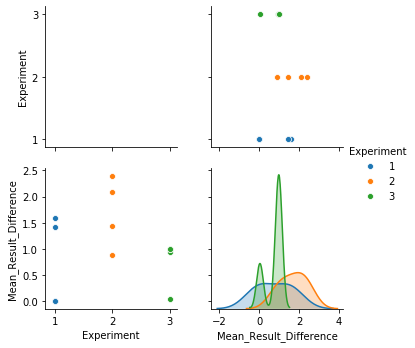

In [104]:
sns.pairplot(mean_result_difference_df, diag_kind='kde', hue= 'Experiment')

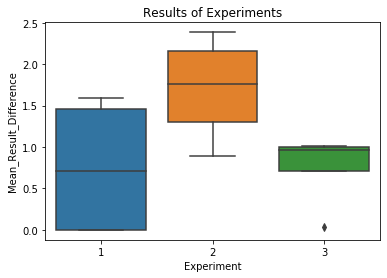

In [105]:
sns.boxplot(x = "Experiment", y = "Mean_Result_Difference", data = mean_result_difference_df)
plt.title('Results of Experiments')
plt.show()

In [109]:
# The boxplots show COMPLETELY DIFFERNET shapes, location and spreads and group 3 has an low outlier.

In [110]:
# Step 1: State the null and alternative hypothesis:

    # 𝐻0 : Results for all three experiments are not significantly different.
    # 𝐻𝐴 : Results for all three experiments are significantly different.

# Step 2: Decide the significance level
    # Here we select 𝛼 = 0.05
    
#Step 3: Identify the test statistic
    
    #Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. 
    #ANOVA uses F-tests to statistically test the equality of means. But we have to use LEVENE's TEST.

#Step 4: Calculate Levene's STAT & P VALUES.

    # scipy.stats.levene : Gives statistic and p value.


In [111]:
import scipy.stats as stats
stats.levene(e1, e2, e3)

# Since P-Value is more than 5%, FAILED TO REJECT NULL HYPOTHESIS. 
    # Results for all three experiments are not significantly different.

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [113]:
# Step 1: State the null and alternative hypothesis:

    # 𝐻0 : Two or more groups have the same population mean
    # 𝐻𝐴 : LESS THAN two groups have the same population mean

# Step 2: Decide the significance level
    # Here we select 𝛼 = 0.05
    
#Step 3: Identify the test statistic
    
    #Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. 

#Step 4: Calculate F, a test statistic

    # scipy.stats.F_ONEWAY : Gives statistic and p value.

stats.f_oneway(e1, e2, e3)

# SINCE P-VALUE IS MORE THAN 5%, WE FAIL TO REJECT NULL HYPOTHESIS.
    # Two or more groups have the same population mean

F_onewayResult(statistic=2.51357622845924, pvalue=0.13574644501798466)

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

TYPE-1 ERROR: H0 is TRUE and we REJECT THE H0

TYPE-2 ERROR: H0 is FALSE and we FAILED TO REJECT THE H0

                              H0 TRUE	             H0 FALSE
    Reject H0	            TYPE-1 Error	      Correct Conclusion
    Failed to reject H0	    Correct Conclusion	  Type-2 Error

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


H0: Wait time to place order has changed(less or more) in past 1 month from 4.5 minutes

HA: Wait time to place order has not changed in past 1 month, still @4.5 minutes

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [114]:
import numpy as np

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [121]:
chi_square_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dice)
print('Chi Square Stat: %3.5f, P-Value: %1.6f, Deg of Freedom: %d' %(chi_square_Stat, p_value, deg_freedom))

Chi Square Stat: 23.31567, P-Value: 0.077664, Deg of Freedom: 15


## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [129]:
mean_value = dice.mean()
print('Mean of Dice Array: %1.6f' %(mean_value))
stats.zscore(dice)

Mean of Dice Array: 6.458333


array([[-0.46291005, -0.18884739, -1.83711731,  1.44115338],
       [ 1.38873015, -0.64208114,  1.22474487,  0.        ],
       [ 0.9258201 ,  0.7176201 ,  0.61237244, -1.44115338],
       [-0.9258201 ,  1.62408759,  0.61237244, -0.96076892],
       [-1.38873015,  0.03776948,  0.        ,  0.        ],
       [ 0.46291005, -1.54854863, -0.61237244,  0.96076892]])

## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [133]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

In [135]:
# Step 1: State the null and alternative hypothesis:

    # 𝐻0 : Weight-Loss drug works by checking the weights of the same group patients before and after treatment 
    # 𝐻𝐴 : Weight-Loss drug doesn't work by checking the weights of the same group patients before and after treatment 

# Step 2: Decide the significance level
    # Here we select 𝛼 = 0.05
    
#Step 3: Identify the test statistic
    
    # Sample sizes for both samples are same.
    # We have two paired samples and we do not know the population standard deviation.
    # The sample is not a large sample, n < 30. So you use the t distribution and the 𝑡𝑆𝑇𝐴𝑇 test statistic for two sample paired test.

"""
Step 4: Calculate F, a test statistic

    We use the scipy.stats.ttest_rel to calculate the T-test on TWO RELATED samples of scores.
    This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical 
    average (expected) values. Here we give the two sample observations as input. This function returns t 
    statistic and two-tailed p value.
"""

# SINCE P-VALUE IS MORE THAN 5%, WE FAIL TO REJECT NULL HYPOTHESIS.
    # LESS THAN two groups (1 GOURP E1 & E3) have the same population mean
    
t_statistic, p_value  =  stats.ttest_rel(after, before )
print('P Value %1.6f' % p_value) 

# Step 5: Decide to reject or accept null hypothesis
    #In this example, p value is 0.000046 and it is less than 5% level of significance
    #So the statistical decision is to reject the null hypothesis at 5% level of significance


P Value 0.000046
